# Practical 2.1 Gradient Desent 

<!--    <img src="gd.png" height="50%" width="60%"> -->

<b>Name:</b> Patel Jaynil Sunilkumar<br>
<b>Roll No:</b> 20MCED08<br>
<b>Course Name:</b> 3CS1111 Applied Machine Learning




In [9]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_boston(return_X_y=True)
X_train_temp1=X[0:400,:]
X_train=np.zeros((X_train_temp1.shape[0],X_train_temp1.shape[1]+1))
X_train[:,0]=np.ones((X_train_temp1.shape[0]))
X_train[:,1:]=X_train_temp1
print("Type of X_train:", type(X_train), "Shape of X_train:", X_train.shape)
y_train=y[0:400]
X_test_temp1=X[400:506,:]
X_test=np.zeros((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))
X_test[:,0]=np.ones((X_test_temp1.shape[0]))
X_test[:,1:]=X_test_temp1
print("Type of X_test:", type(X_test), "Shape of X_test:", X_test.shape)
y_test=y[400:506]
scaler=StandardScaler()
scaler.fit(X_train[:,1:])
X_train[:,1:]=scaler.transform(X_train[:,1:])
X_test[:,1:]=scaler.transform(X_test[:,1:])

theta=np.random.uniform(0,1,size=(X_train.shape[1]))
print("Type of theta:", type(theta), "Shape of Theta:", theta.shape)

                 
m=X_train.shape[0]              #number of samples
n=X_train.shape[1]              


iterations_001 =[]
error_mse_001 = []
iterations=[]

n_iterations=100
iterations.extend(range(n_iterations))


def train(niterations, alpha, X_train, y_train, theta=np.random.uniform(0,1,size=(X_train.shape[1]))):
    error_mse=[]   
    
    for i in range(niterations):
        update=np.zeros(X_train.shape[1])                       #update is an array of size 14
        ypred=np.dot(X_train,theta)                             #y = theta_T.X
        error=ypred - y_train                                   #find error
        for j in range(n):                                      #iterate over each all values(400) in each attribute
            update[j]=np.sum(error*(X_train.T)[j])              #update[j] =(h-y).x       (400)
            theta = theta - (1/m)*(alpha)*update           
        mse = metrics.mean_squared_error(y_train,ypred)    #updated values of theta
        error_mse.append(metrics.mean_squared_error(y_train,ypred))
        #error_mse
    #return theta
    return  error_mse

def train1(niterations, alpha, X_train, y_train, theta=np.random.uniform(0,1,size=(X_train.shape[1]))):
    error_mse=[]   
    
    for i in range(niterations):
        update=np.zeros(X_train.shape[1])                       #update is an array of size 14
        ypred=np.dot(X_train,theta)                             #y = theta_T.X
        error=ypred - y_train                                   #find error
        for j in range(n):                                      #iterate over each all values(400) in each attribute
            update[j]=np.sum(error*(X_train.T)[j])              #update[j] =(h-y).x       (400)
            theta = theta - (1/m)*(alpha)*update           
        mse = metrics.mean_squared_error(y_train,ypred)    #updated values of theta
        error_mse.append(metrics.mean_squared_error(y_train,ypred))
        #error_mse
    #return theta
    return  mse

#alpha_list = [0.001,0.005,0.07,0.01,0.05]
alpha_list = [0.001,0.005,0.006,0.008,0.01]
alpha_default = 0.01

iter_list = [10,100,1000,5000,10000,15000]
mse_list=[]
mse_list_itera = []


for alpha in alpha_list:
    mse_list.append(train(n_iterations, alpha, X_train, y_train, theta))
    
for itera in iter_list:
    mse_list_itera.append(train1(itera, alpha_default, X_train, y_train, theta))    
    
    

Type of X_train: <class 'numpy.ndarray'> Shape of X_train: (400, 14)
Type of X_test: <class 'numpy.ndarray'> Shape of X_test: (106, 14)
Type of theta: <class 'numpy.ndarray'> Shape of Theta: (14,)


In [10]:
mse_list_itera

[80.57028516669797,
 25.77026766191904,
 22.31193088356102,
 22.305225584163463,
 22.305225584163445,
 22.305225584163445]

# Graph 1 (Alpha vs MSE)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline


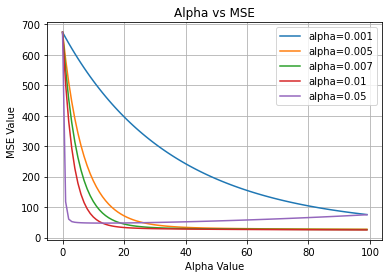

In [12]:
iterations=[]
iterations.extend(range(n_iterations))
plt.xlabel('Alpha Value')
plt.ylabel('MSE Value')
plt.title('Alpha vs MSE')

alpha_001 = plt.plot(iterations, train(100, 0.001, X_train, y_train), label="alpha=0.001")

alpha_005 = plt.plot(iterations,train(100, 0.005, X_train, y_train), label="alpha=0.005")
alpha_007 = plt.plot(iterations,train(100, 0.007, X_train, y_train), label="alpha=0.007")
alpha_01 = plt.plot(iterations,train(100, 0.01, X_train, y_train), label="alpha=0.01")
alpha_05 = plt.plot(iterations,train(100, 0.05, X_train, y_train), label="alpha=0.05")

plt.legend(loc='best')
plt.grid()
plt.show()

# Graph 2 (Iteration vs MSE)

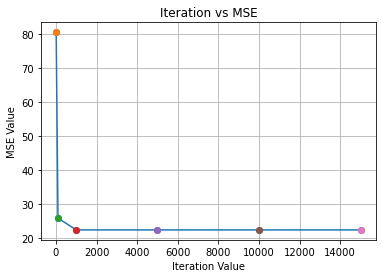

In [15]:
plt.xlabel('Iteration Value')
plt.ylabel('MSE Value')
plt.title('Iteration vs MSE')


plt.plot(iter_list,mse_list_itera,marker='o')
for ite,mse in zip(iter_list,mse_list_itera):
    plt.plot(ite, mse,marker='o')
    

plt.grid()
plt.show()

# Practical 2.2 Normal Equation 

   <img src="ne.jpeg" height="80%" width="60%">

In [75]:
import numpy as np
from sklearn import datasets, metrics
from numpy.linalg import inv, pinv, LinAlgError

X, y = datasets.load_boston(return_X_y=True)

X_train_temp1=X[0:400,:]
X_train=np.zeros((X_train_temp1.shape[0],X_train_temp1.shape[1]+1))
X_train[:,0]=np.ones((X_train_temp1.shape[0]))
X_train[:,1:]=X_train_temp1

print("Type of X_train:", type(X_train), "Shape of X_train:", X_train.shape)

y_train=y[0:400]
X_test_temp1=X[400:506,:]
X_test=np.zeros((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))
X_test[:,0]=np.ones((X_test_temp1.shape[0]))
X_test[:,1:]=X_test_temp1

print("Type of X_test:", type(X_test), "Shape of X_test:", X_test.shape)

y_test=y[400:506]

theta=np.zeros(X_train.shape[1])
try:
  XTXi=inv(np.dot(X_train.T,X_train))
except LinAlgError:
  XTXi=pinv(np.dot(X_train.T,X_train))
XTy=np.dot(X_train.T,y_train)
theta=np.dot(XTXi,XTy)
#print("Thetas:", theta)
#print("Thetas Shape:", theta.shape)
predictions=np.dot(theta,X_test.T)

print("\nMAE:", metrics.mean_absolute_error(y_true=y_test,y_pred=predictions))
print("\nMSE:", metrics.mean_squared_error(y_true=y_test,y_pred=predictions))

Type of X_train: <class 'numpy.ndarray'> Shape of X_train: (400, 14)
Type of X_test: <class 'numpy.ndarray'> Shape of X_test: (106, 14)

MAE: 5.142232214464803

MSE: 37.89377859959266


# Observation

 <p> While using gradient descent as we can decrease the value of the alpha curve also getting smoother and quickly decrease the value of MSE.

The no of iterations also affecting the value of MSE like when we increase the value of iterations the MSE starts decreasing after one point it's settle to one number and then we try to increase the number of iteration it's doesn't affect the MSE.</p>